In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [5]:
image_path = '../output_videos/cropped_player_image.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

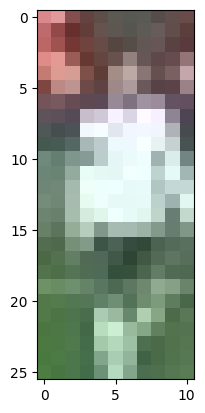

In [6]:
plt.imshow(image)

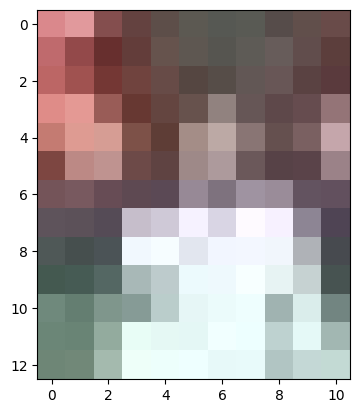

In [10]:
#take the top half of the image
top_half = image[0:image.shape[0]//2,:]
plt.imshow(top_half)

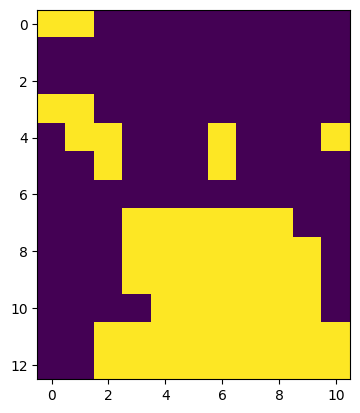

In [12]:
#cluster the image into two clusters
image_2D= top_half.reshape(-1,3)


kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2D)

#get the cluster labels
labels = kmeans.labels_
#reshae the labels to the shape of the image
labels = labels.reshape(top_half.shape[0],top_half.shape[1])

#display the image
plt.imshow(labels)

In [14]:
corner_cluster = [labels[0,0], labels[0,-1], labels[-1,0], labels[-1,-1]]
#player cluster is the cluster that is not in the corners
player_cluster = 1 if corner_cluster.count(0) > corner_cluster.count(1) else 0
print(player_cluster)

0


In [15]:
kmeans.cluster_centers_[player_cluster]

array([110.49438202,  91.96629213,  91.16853933])